# ARIMA for trust prediction 

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [13]:
# transforms the prportion using logarithm in ordere to make predictions easier
def LogarithmProportion(row, column_name):
    p = row[column_name]
    return np.log(p/(1-p))
df = pd.read_csv(r".\data\merged_PAS_Crine.csv")
df['Proportion'] = df.apply(lambda row: LogarithmProportion(row, "Proportion"), axis=1)
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# checking if column stores datetime
type(df["Date"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df = df.set_index('Date')
df.head()

,Anti-social behaviour,Other crime,Burglary,Vehicle crime,Robbery,Other theft,Criminal damage and arson,Drugs,Shoplifting,Violence and sexual offences,Theft from the person,Public order,Bicycle theft,Possession of weapons,Proportion
Date,,,,,,,,,,,,,,,
2015-04-01,18327,685,5375,6569,1766,8457.0,5078.0,2591.0,3679.0,13536.0,3013.0,3302.0,1407.0,283.0,1.815290
2015-05-01,19630,706,5524,6993,1882,9245.0,5348.0,2658.0,3627.0,15058.0,3200.0,3504.0,1663.0,285.0,1.900959
2015-06-01,21392,734,5245,7261,1707,9383.0,5260.0,2780.0,3515.0,16562.0,2686.0,3720.0,1696.0,318.0,1.900959
2015-07-01,23311,757,5368,6630,1764,9821.0,5405.0,2922.0,3430.0,17432.0,2650.0,3793.0,1762.0,316.0,1.992430
2015-08-01,21826,683,5343,6454,1771,8927.0,4935.0,2961.0,3422.0,16176.0,2366.0,3561.0,1475.0,329.0,1.992430


<Axes: xlabel='Date'>

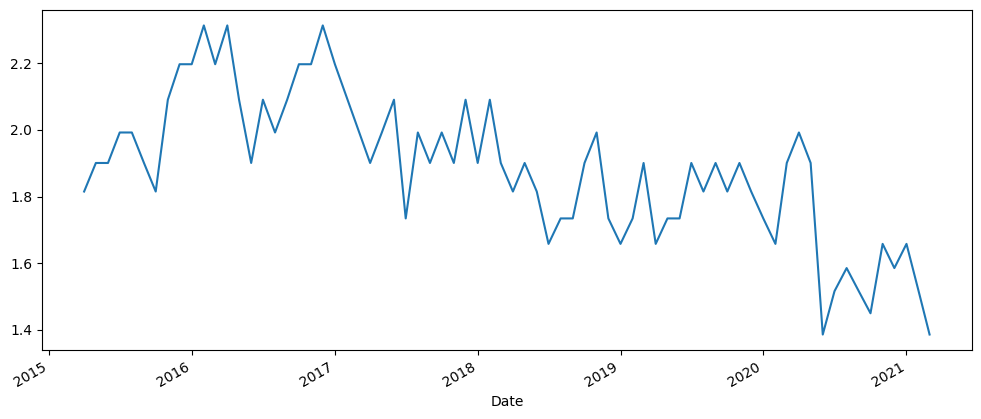

In [18]:
df['Proportion'].plot(figsize=(12,5))

In [21]:
# check for statioarity

def ad_test(data):
    dftest  = adfuller(data, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of observations used for ADF Refression and Critical Values Calculation :", dftest[3])
    print("5. Critical values : ")
    for key, val in dftest[4].items():
        print("\t", key, ":", val)

In [22]:
ad_test(df["Proportion"]) # data is not stationary, thus ARIMA cannot be implemented, p value not significant

1. ADF :  0.3644150750951254
2. P-Value :  0.9801142953356451
3. Num of Lags :  7
4. Num of observations used for ADF Refression and Critical Values Calculation : 62
5. Critical values : 
	 1% : -3.540522678829176
	 5% : -2.9094272025108254
	 10% : -2.5923136524453696
